/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:86: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning 

Quantization Level:Bit Dictionary =

-7.0 : 00000000
-6.9581838472132365 : 00000001
-6.916367694426474 : 00000010
-6.87455154163971 : 00000011
-6.832735388852947 : 00000100
-6.790919236066184 : 00000101
-6.7491030832794205 : 00000110
-6.707286930492657 : 00000111
-6.6654707777058935 : 00001000
-6.623654624919131 : 00001001
-6.581838472132367 : 00001010
-6.540022319345604 : 00001011
-6.498206166558841 : 00001100
-6.4563900137720776 : 00001101
-6.414573860985314 : 00001110
-6.372757708198551 : 00001111
-6.330941555411788 : 00010000
-6.289125402625024 : 00010001
-6.247309249838262 : 00010010
-6.205493097051498 : 00010011
-6.163676944264735 : 00010100
-6.121860791477971 : 00010101
-6.080044638691208 : 00010110
-6.038228485904445 : 00010111
-5.996412333117681 : 00011000
-5.954596180330919 : 00011001
-5.912780027544155 : 00011010
-5.870963874757392 : 00011011
-5.829147721970628 : 00011100
-5.787331569183865 : 00011101
-5.745515416397102 : 00011110
-5.703699263610339 : 00011111
-5.66188311082

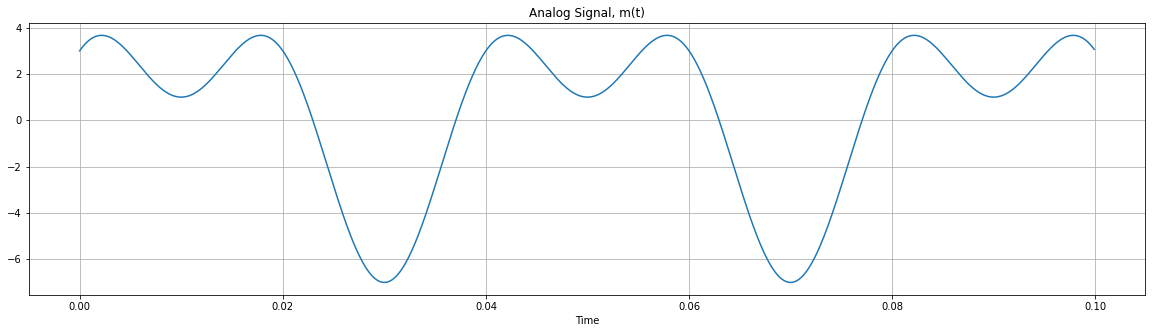

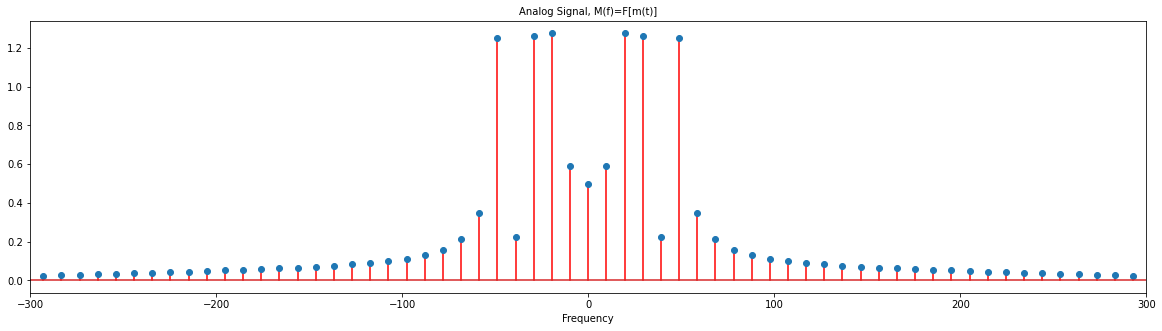

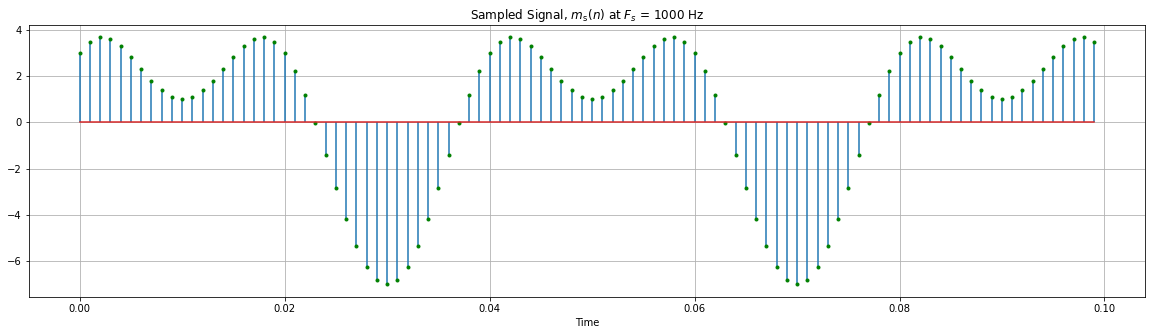

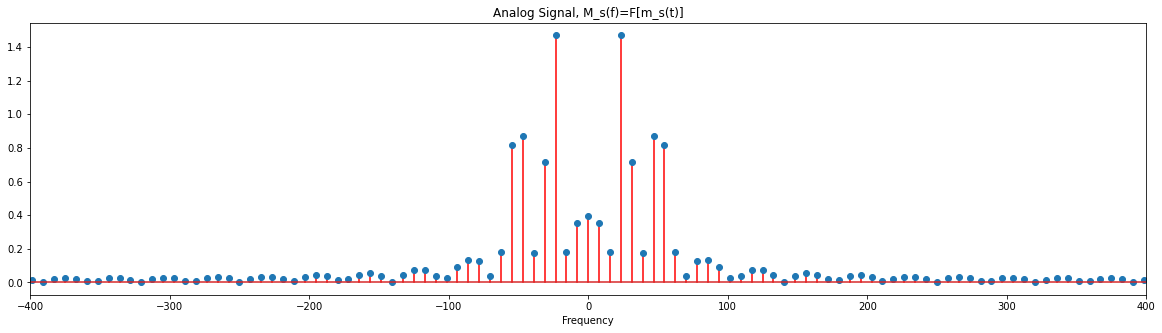

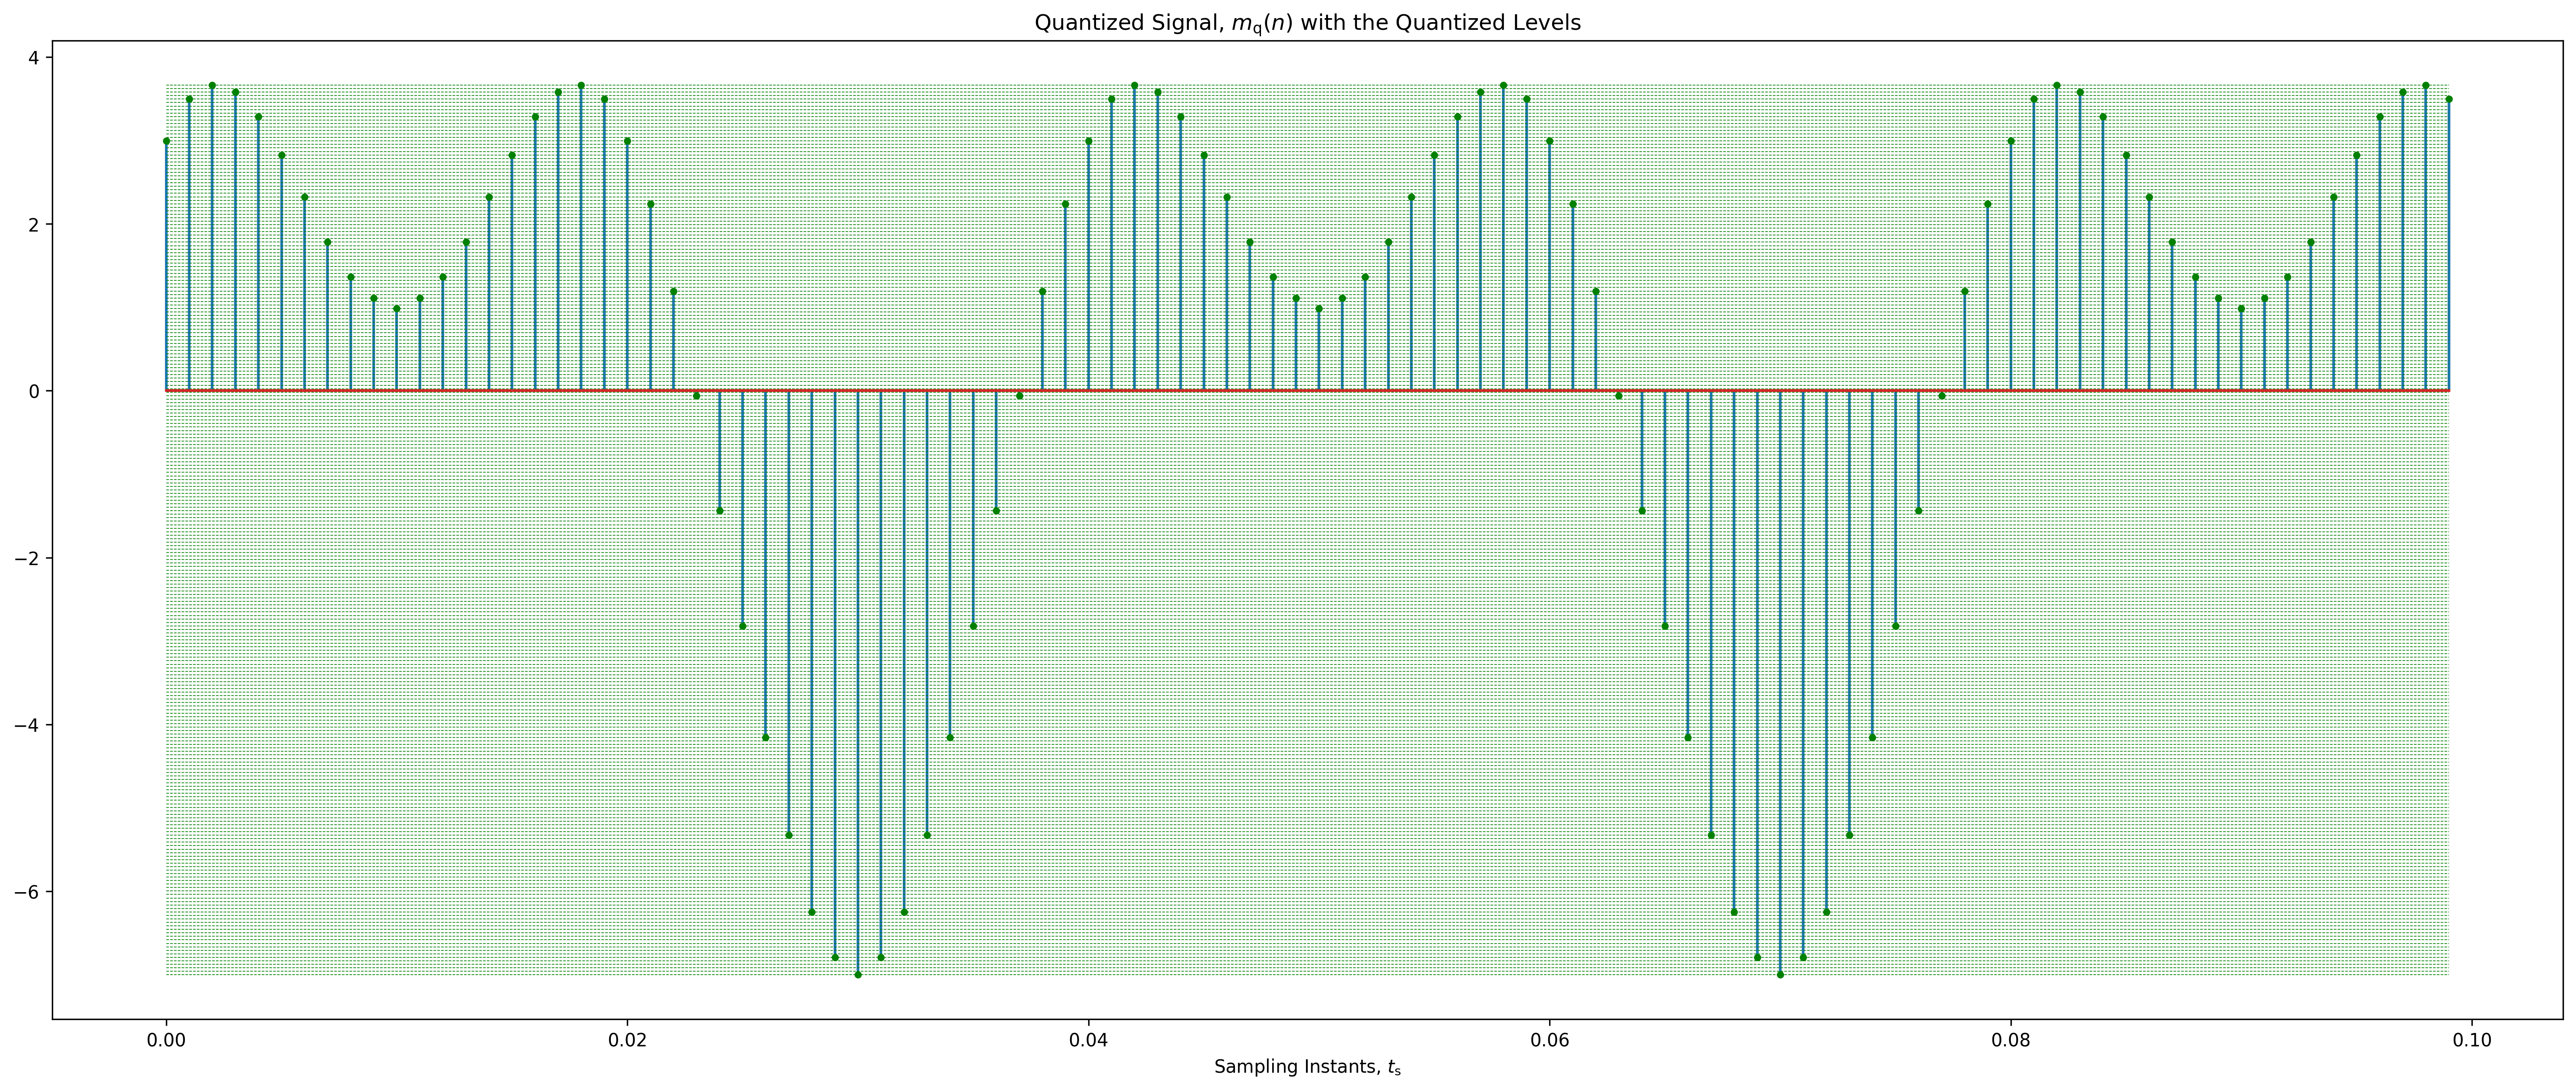

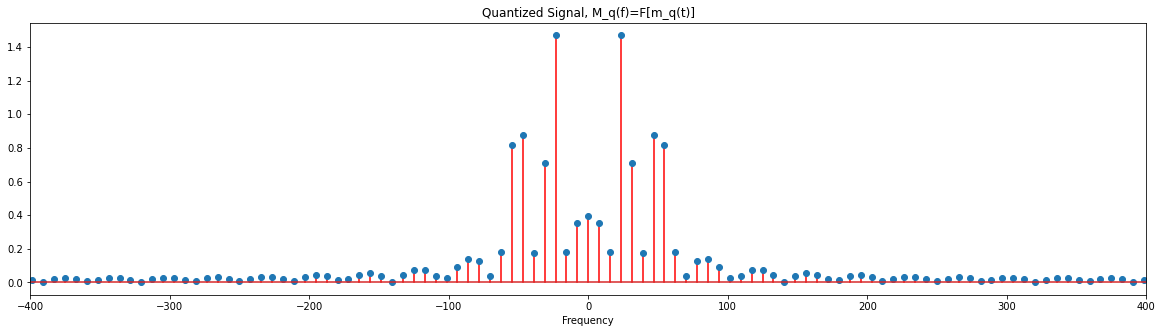

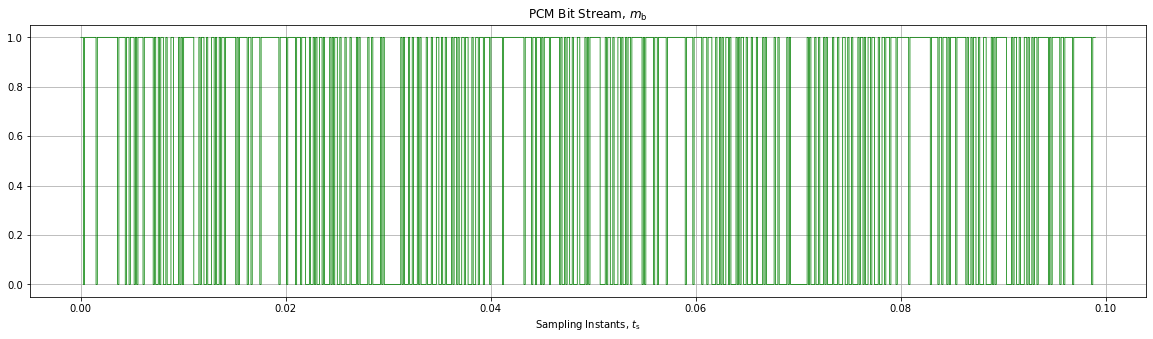

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.fftpack import fft,fftshift,fftfreq
import scipy.signal as sg

#Function for generating frequency domain
def FT(x,t):
  N=int(2**np.ceil(np.log2(len(x))));
  Ts=np.mean(np.diff(t));
  x_paded=np.append(x,[0]*(N-len(x)))
  X_freq=fftshift(fft(x_paded))/N
  freq=fftshift(fftfreq(N,Ts))
  return X_freq, freq

#Generating analog signal
F_g=10000
TimeRange=(0,.1)
Time=np.arange(TimeRange[0], TimeRange[1], 1/F_g)

A,B=3,4
m_t=A*np.cos(100*np.pi*Time) + B*np.sin(50*np.pi*Time)
M_T,f=FT(m_t,Time)

plt.figure(1,figsize=(20,5))#time domain plot of x(t)
plt.xlabel("Time"); 
plt.title(r"Analog Signal, m(t)");
plt.plot(Time,m_t)
plt.grid()

plt.figure(2,figsize=(20,5))#frequency domain plot of m(t)
plt.stem(f,abs(M_T),'r')
plt.xlim([-300,300])
plt.xlabel("Frequency"); 
plt.title(r"Analog Signal, M(f)=F[m(t)]",fontsize=10);
plt.grid


#Sampling of m(t)
F_s = 1000 #Given in question
Bin = int(F_g/F_s) # Bin size for drawing one sample
m_s = m_t[0:-1:Bin] # Sampled Signal
t_s = Time[0:-1:Bin]


plt.figure(3, figsize = (20,5))
plt.stem(t_s, m_s, markerfmt='.g', use_line_collection=True)
plt.xlabel(r"Time")
plt.title(r"Sampled Signal, $m_\mathrm{s}(n)$ at $F_s$ = 1000 Hz")
plt.grid()

#for frequency domain of m_s(n)
M_s,f1=FT(m_s,t_s)

plt.figure(4,figsize=(20,5))#frequency domain plot of m_s(n)
plt.stem(f1,abs(M_s),'r')
plt.xlim([-400,400])
plt.xlabel("Frequency"); 
plt.title(r"Analog Signal, M_s(f)=F[m_s(t)]");
plt.grid


#Quantization of m_s
L = 256 # Number of Quantization levels
Delta = (max(m_s)-min(m_s))/(L-1) # Quantization step
levels = np.linspace(min(m_s), max(m_s), L)# Generating Quantization Levels

# Generating Quantized Signal, m_q(n)
m_q = np.array([]) # Declaring quantized signal
for m in m_s:
  idx = np.argmin(abs((m - levels))) # Nearest Q-index
  m_q = np.append(m_q, levels[idx]) # Append the Q-value

# Plot Quantized signal along with the Q-levels
plt.figure(5, figsize = (25,10),dpi=300)
for i in levels:
  plt.plot(t_s, i*np.ones(len(t_s)), '--g', linewidth=0.4)
plt.stem(t_s, m_q, markerfmt='.g', use_line_collection=True)
plt.xlabel(r"Sampling Instants, $t_\mathrm{s}$")
plt.title(r"Quantized Signal, $m_\mathrm{q}(n)$ with the Quantized Levels")

#Frequency domain for m_q
M_q,f2=FT(m_q,t_s)

plt.figure(6,figsize=(20,5))#frequency domain plot of m_q(n)
plt.stem(f2,abs(M_q),'r')
plt.xlim([-400,400])
plt.xlabel("Frequency"); 
plt.title(r"Quantized Signal, M_q(f)=F[m_q(t)]");
plt.grid

#Conversion the signal into PCM
b=int(np.ceil(np.log2(L)))

bit_dict={}
for i in range(0,L):
  bit_dict[levels[i]]= bin(i)[2:].zfill(b)
print("Quantization Level:Bit Dictionary =\n")
[print(keys,":",vals) for keys, vals in bit_dict.items()]

m_bit=""
for m in m_q:
  m_bit +=bit_dict[m]
print("\nPCM Bit String (Binary) =",m_bit)

bit_rate=len(m_bit)/TimeRange[-1]
print("\n Simulated Bit Rate=", bit_rate/1e3,"kbps")

m_bit_sig=np.fromiter(m_bit,float)
t_bit=np.linspace(t_s[0],t_s[-1],8*len(t_s))

plt.figure(7, figsize=(20,5))
plt.step(t_bit, m_bit_sig, 'g', linewidth=0.75)
plt.xlabel(r"Sampling Instants, $t_\mathrm{s}$")
plt.title(r"PCM Bit Stream, $m_\mathrm{b}$")
plt.grid()



<function matplotlib.pyplot.grid>

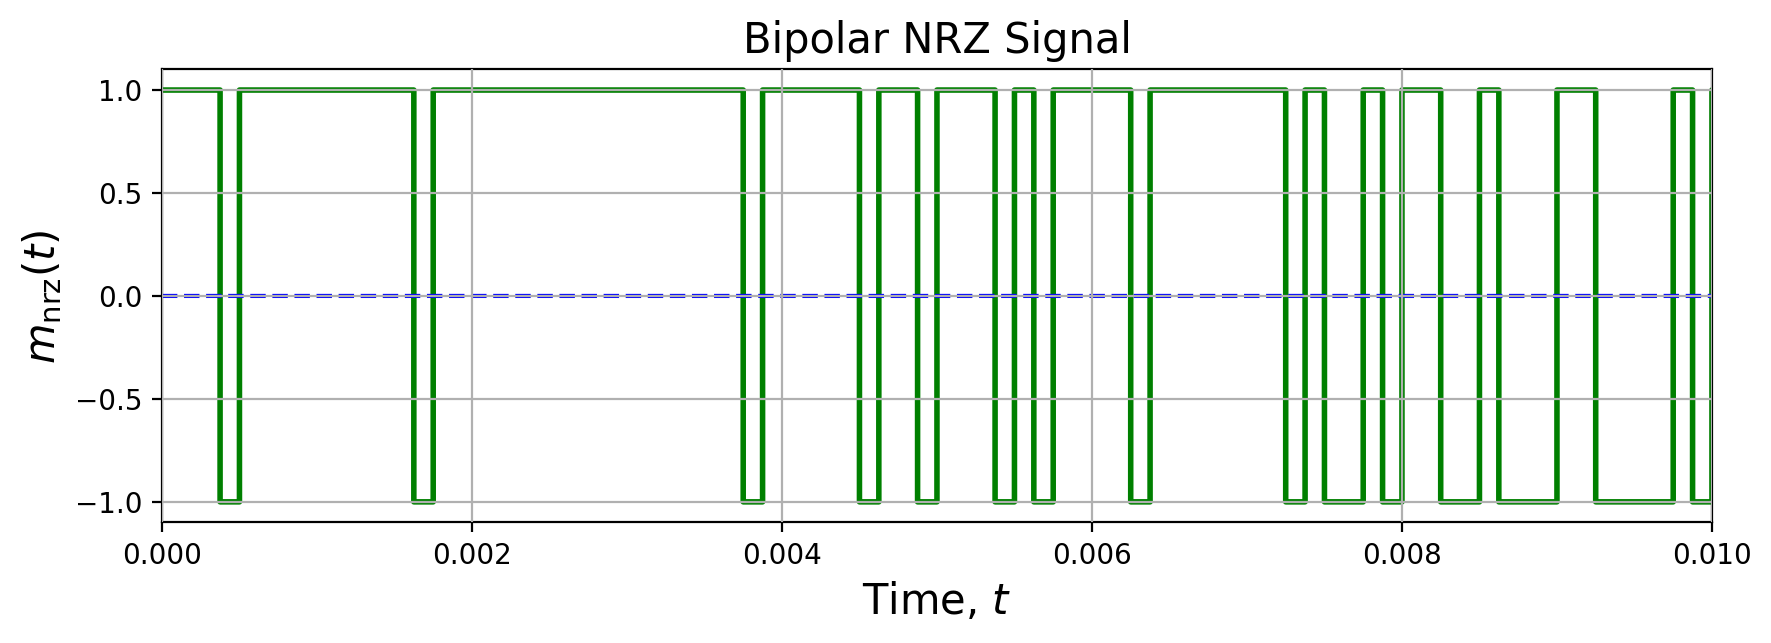

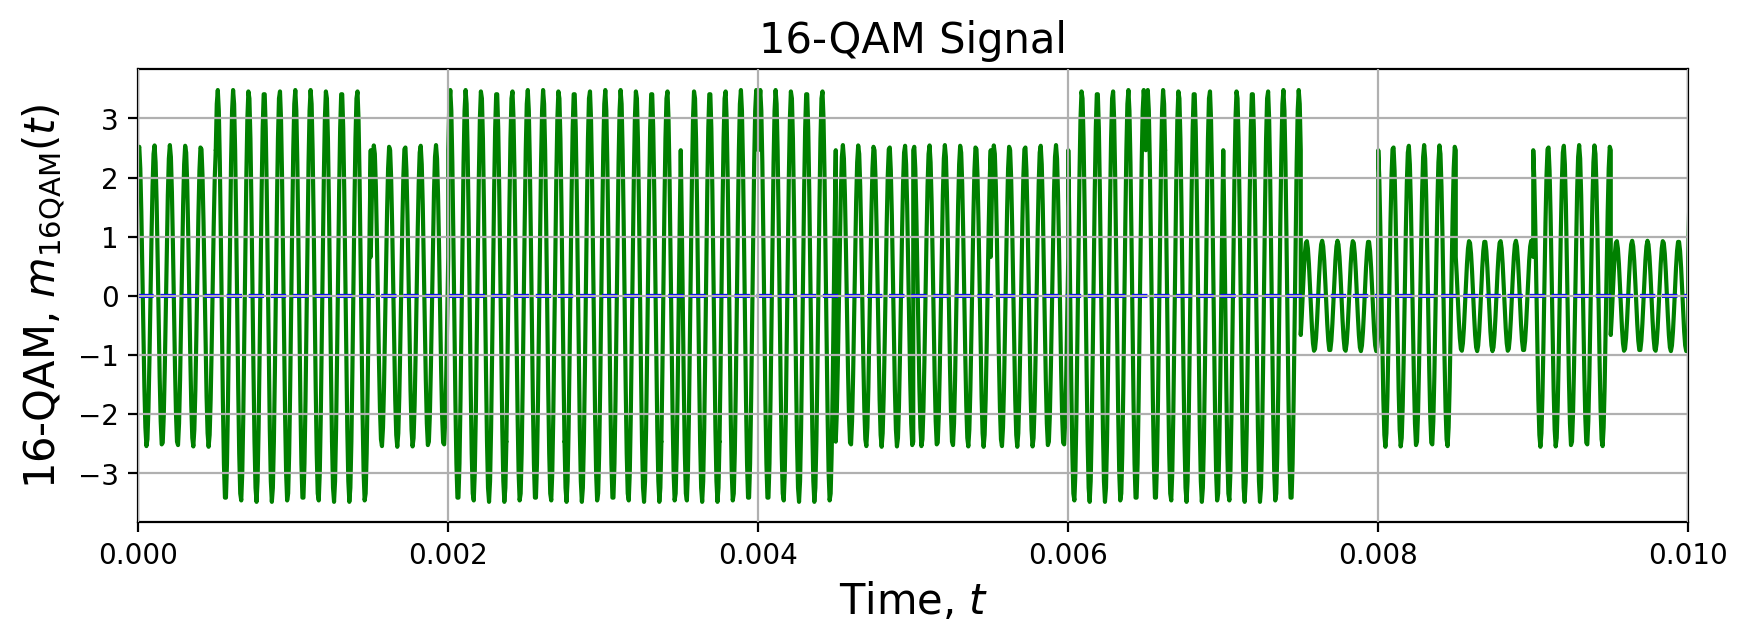

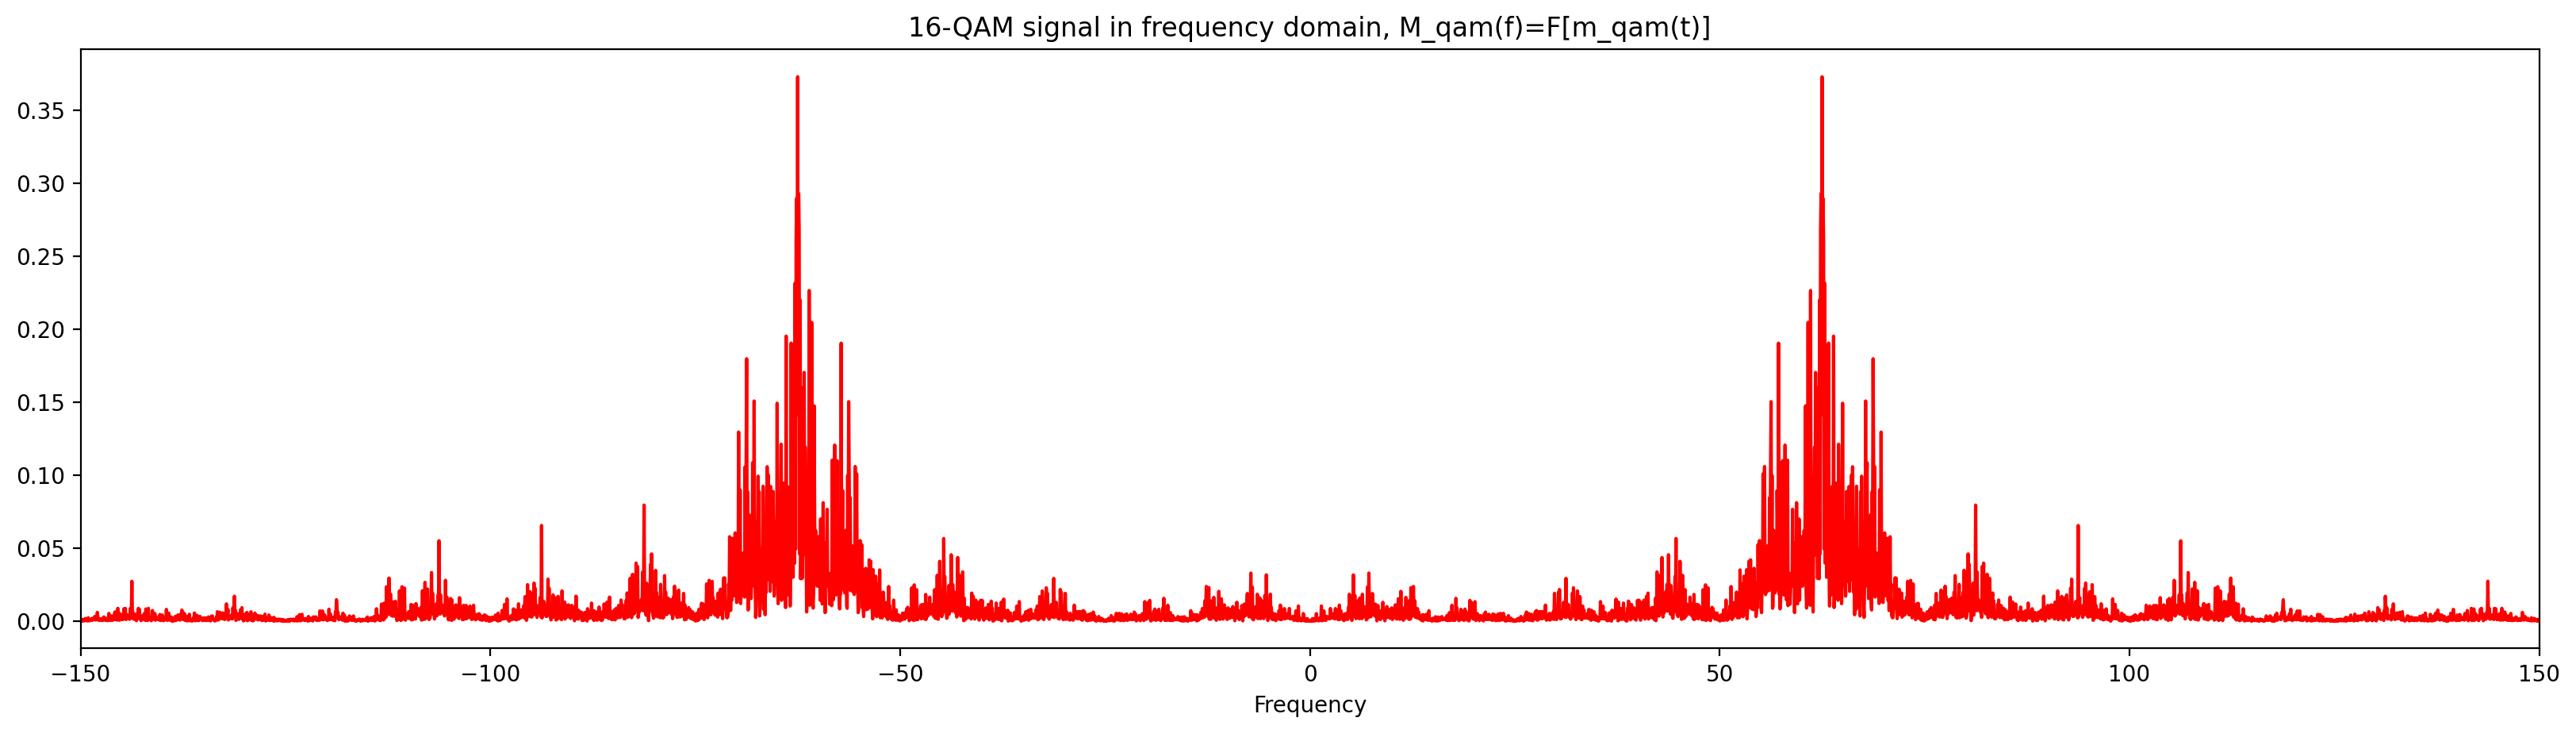

In [ ]:
import numpy as np
import cmath
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex = False)
plt.rc('axes', axisbelow=False)

bits = m_bit
if len(bits)%4==1: # bit length must be divided by 4
  bits+='000'
if len(bits)%4==2: # bit length must be divided by 4
  bits+='00'
if len(bits)%4==3: # bit length must be divided by 4
  bits+='0'

BitLen = len(bits) # bit-length
Rb = 8e3 # bit rate
Tb = (1/Rb) # bit period
fc = 10e3 # carrier frequency, make it multiple of Rb

# Bit duration and total time grid
Nb = 20 # points per bit period
bit_time = np.linspace(0, Tb, Nb) # time grid for bit duration
bit_time_double = np.linspace(0, 2*Tb, 2*Nb) # time for 2 x bit duration
bit_time_four = np.linspace(0, 4*Tb, 4*Nb)
time = [] # Total time grid
for i in range(BitLen):
  time.extend(bit_time + i*Tb) # append bit grids serially
time = np.array(time) # converting list to np array

# ---------------------- Transmitter Section ----------------------#
# separation of bits into 4 individual bitstream for magnnitude and phase

b_q,c_b_q,b_i,c_b_i='','','',''

for i in range(BitLen):
  if i%4==0:
    b_q += bits[i] + bits[i] + bits[i] + bits[i]  
  if i%4==1:
    c_b_q += bits[i] + bits[i] + bits[i] +  bits[i]
  if i%4==2:
    b_i += bits[i] + bits[i] + bits[i] + bits[i]
  if i%4==3:
    c_b_i += bits[i] +  bits[i] + bits[i] +  bits[i]


# Bipolar NRZ signals
m_bnrz,m_b_q,m_c_b_q,m_b_i,m_c_b_i= [],[],[],[],[]
for i in range(BitLen):
  m_bnrz.extend(np.ones(len(bit_time))) if int(bits[i]) else m_bnrz.extend(-np.ones(len(bit_time)))

for element in b_q:
  if element=='0':
    m_b_q.append(-1) # phase shift for 0 and 1
  else:
    m_b_q.append(1) #  +1 for 1 and -1 for 0

for element in b_i:
  if element=='0':
    m_b_i.append(-1)
  else:
    m_b_i.append(1)

for element in c_b_q:
  if element=='0':
    m_c_b_q.append(.22) # magnitude 
  else:
    m_c_b_q.append(.821)  

for element in c_b_i:
  if element=='0':
    m_c_b_i.append(.22)
  else:
    m_c_b_i.append(.821) 

m_bnrz,m_b_q,m_c_b_q,m_b_i,m_c_b_i = np.array(m_bnrz),np.array(m_b_q),np.array(m_c_b_q),np.array(m_b_i),np.array(m_c_b_i)

odd = np.array(m_b_q)*np.array(m_c_b_q)
even = np.array(m_b_i)*np.array(m_c_b_i)


e=np.repeat(even,20)
o=np.repeat(odd,20)

# QPSK Signal
A = 3 
m_even = e*A*np.sin(2*np.pi*fc*time)
m_odd = o*A*np.cos(2*np.pi*fc*time)
m_qam = m_even + m_odd  


#Frequency domain for x_qam
M_qam,f3=FT(m_qam,t_s)


# Plotting NRZ signals
plt.figure(8, figsize=(10, 3), dpi=200)
plt.plot(time, m_bnrz, '-g', linewidth=2)
plt.plot(time, np.zeros(len(time)), '--b') # showing x-axis
plt.title(r"Bipolar NRZ Signal", fontsize=15)
plt.xlabel(r"Time, $t$", fontsize=15)
plt.ylabel(r"$m_\mathrm{nrz}(t)$", fontsize=15)
plt.xlim([0,.01])
plt.grid()

# Plotting 16-QAM signal
plt.figure(9, figsize=(10, 3), dpi=200)
plt.plot(time, m_qam, '-g', linewidth=1.5)
plt.plot(time, np.zeros(len(time)), '--b') # showing x-axis
plt.title(r"16-QAM Signal", fontsize=15)
plt.xlabel(r"Time, $t$", fontsize=15)
plt.ylabel(r"16-QAM, $m_\mathrm{16QAM}(t)$", fontsize=15)
plt.xlim([0,.01])
plt.grid()


plt.figure(10,figsize=(20,5), dpi=200)#frequency domain plot of m_qam(n)
plt.plot(f3,abs(M_qam),'r')
plt.xlim([-150,150])
plt.xlabel("Frequency"); 
plt.title(r"16-QAM signal in frequency domain, M_qam(f)=F[m_qam(t)]");
plt.grid

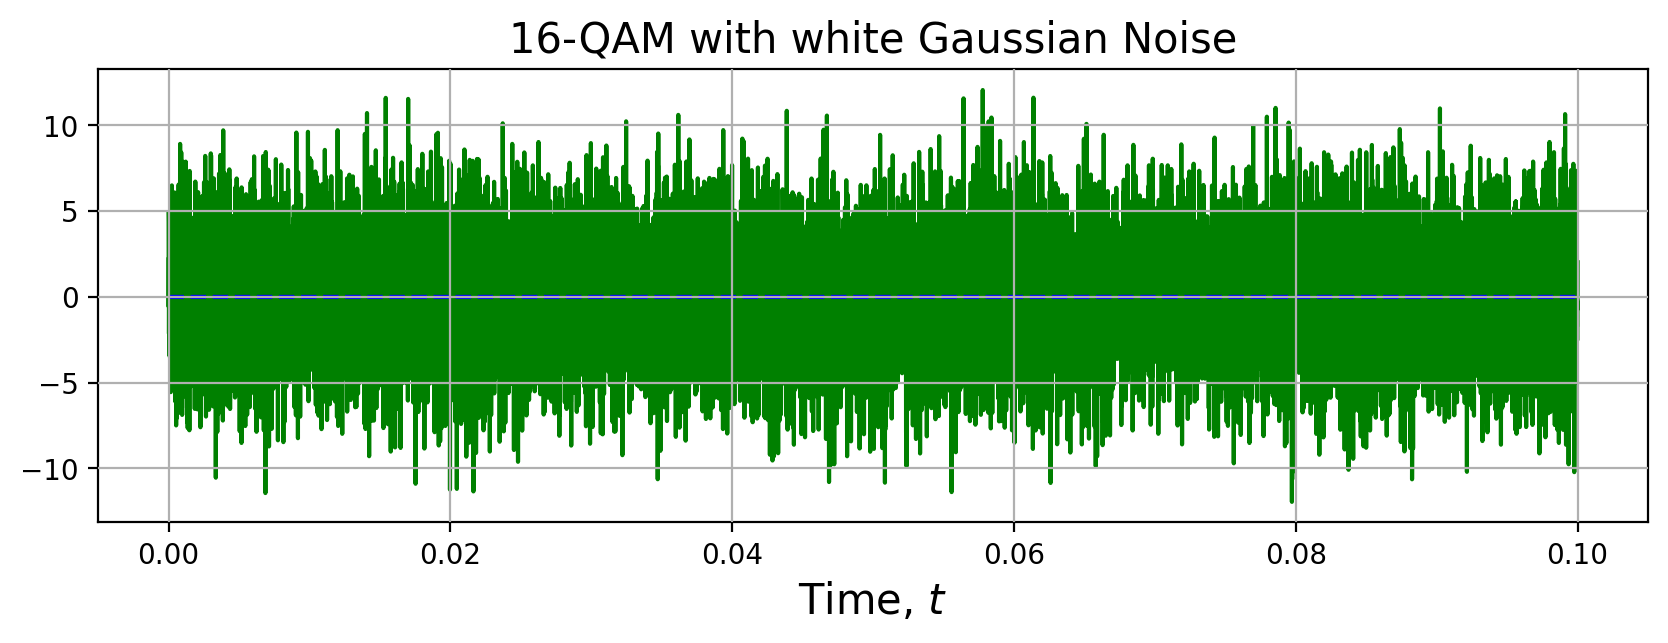

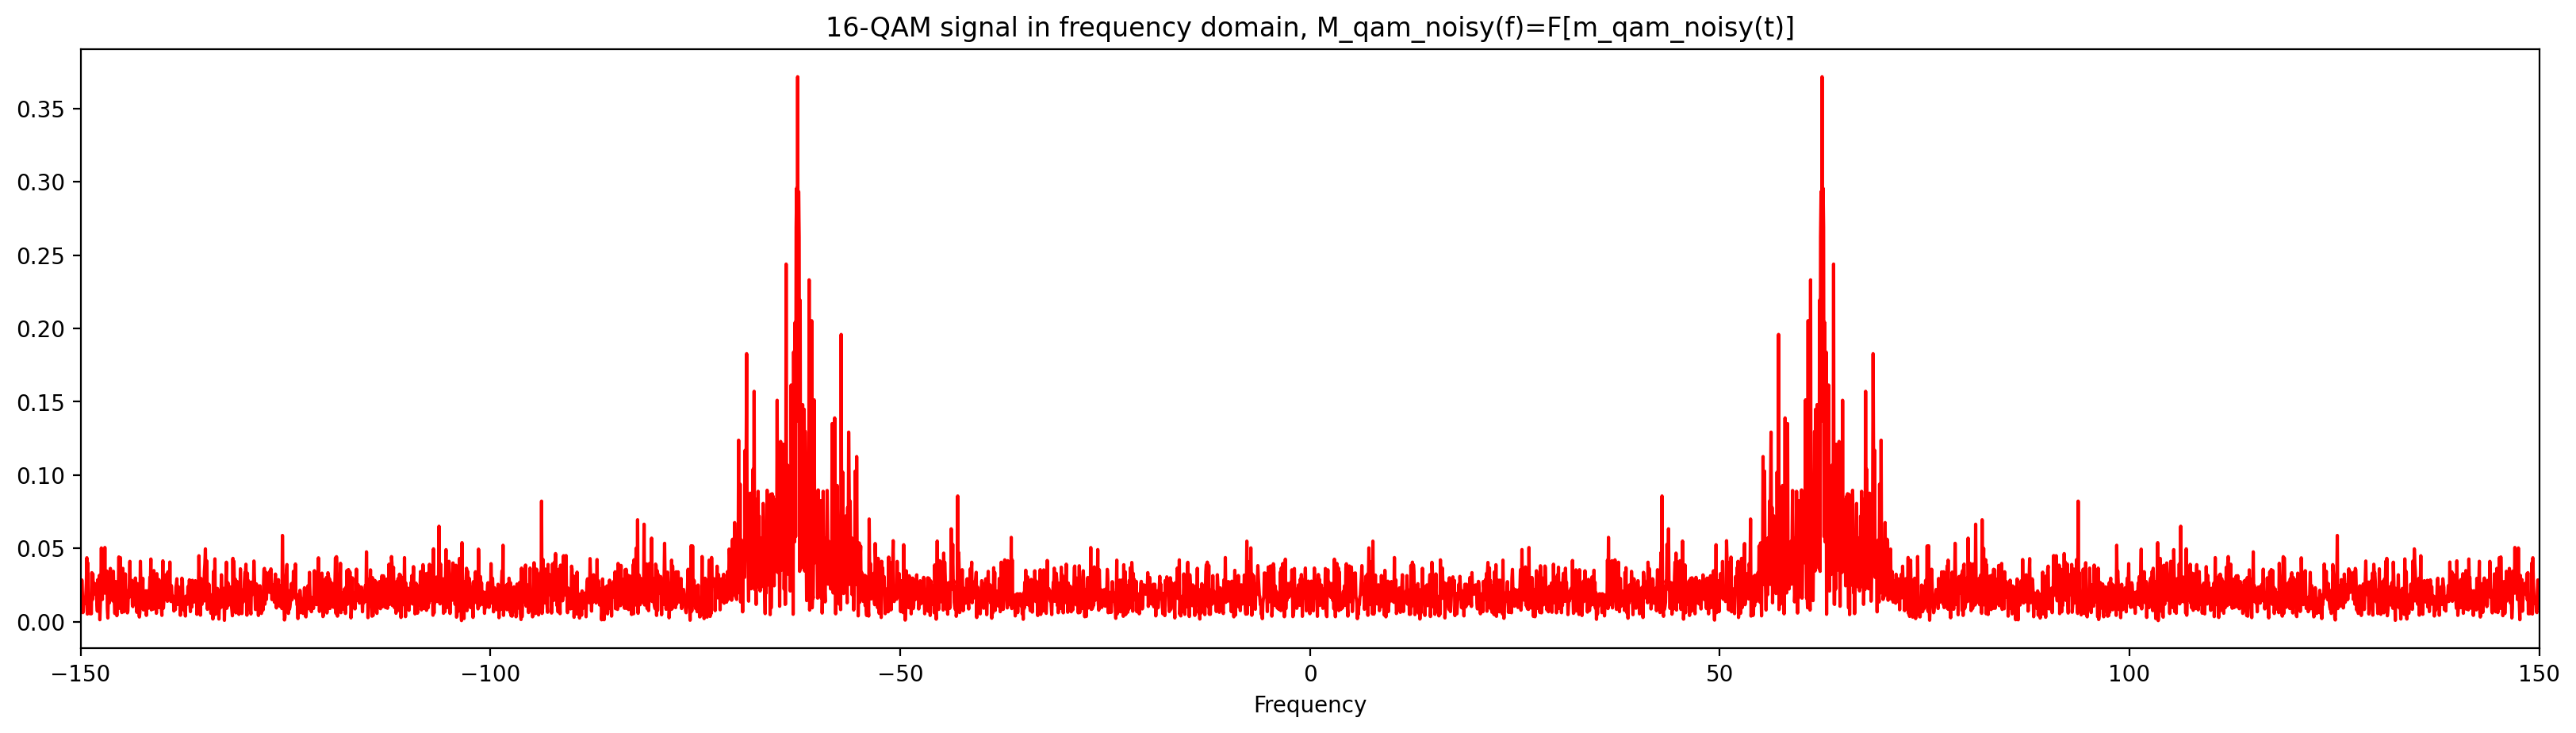

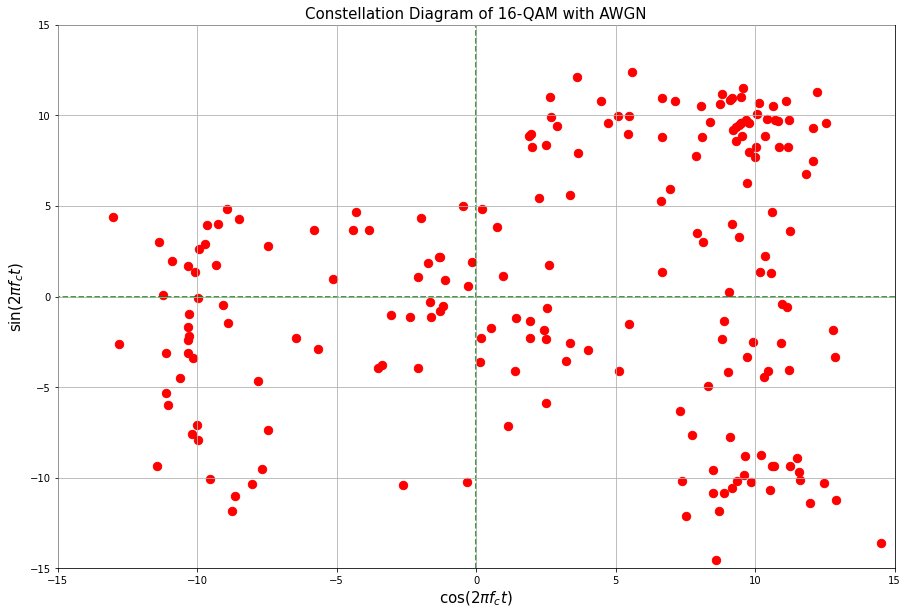

In [ ]:
# ----------------------- AWGN Channel -------------------------- #
SNRdB = -3
Pn = np.mean(m_qam**2)/10**(SNRdB/10)
sigma, mu = np.sqrt(Pn), 0
m_noise = np.zeros(len(time))
for i in range(len(time)):
  m_noise[i] = np.random.normal(mu, sigma, 1)
m_qam_noisy = m_qam + m_noise

#Frequency domain for x_qam_noisy
M_qam_noisy,f4=FT(m_qam_noisy,t_s)


# Noisy constellation diagram generation
basis1 = np.cos(2*np.pi*fc*bit_time_four)
basis2 = np.sin(2*np.pi*fc*bit_time_four)
pn_cos, pn_sin = [], []
for i in range(int(BitLen/4)):
  x_tmp = m_qam_noisy[i*4*Nb:(i+1)*4*Nb]
  pn_cos.append(8*np.mean(x_tmp*basis1))
  pn_sin.append(8*np.mean(x_tmp*basis2))
pn_cos, pn_sin = np.array(pn_cos), np.array(pn_sin)

# plotting noisy signal
plt.figure(11, figsize=(10, 3), dpi=200)
plt.plot(time, m_qam_noisy, '-g', linewidth=1.5)
plt.title(r"16-QAM with white Gaussian Noise", fontsize=15)
plt.plot(time, np.zeros(len(time)), '--b') # showing x-axis
plt.xlabel(r"Time, $t$", fontsize=15)
plt.grid()

# plotting noisy 16QAM in frequency domain
plt.figure(12,figsize=(20,5), dpi=200)#frequency domain plot of m_qam(n)
plt.plot(f4,abs(M_qam_noisy),'r')
plt.xlim([-150,150])
plt.xlabel("Frequency"); 
plt.title(r"16-QAM signal in frequency domain, M_qam_noisy(f)=F[m_qam_noisy(t)]");
plt.grid

# Noisy constellation diagram
plt.figure(13,figsize=(15,10))
plt.scatter(pn_cos, pn_sin, color='r', s=70)
plt.plot(np.linspace(-10*A, 10*A, len(pn_cos)), np.zeros(len(pn_cos)), '--g') # showing x-axis
plt.plot(np.zeros(len(pn_cos)), np.linspace(-10*A, 10*A, len(pn_cos)), '--g') # showing y-axis
plt.title(r"Constellation Diagram of 16-QAM with AWGN", fontsize=15)
plt.xlabel(r"$\cos(2\pi f_ct)$", fontsize=15)
plt.ylabel(r"$\sin(2\pi f_ct)$", fontsize=15)
plt.ylim([-15, 15]); 
plt.xlim([-15, 15]); plt.grid()


Transmitted Bits = 11101111111110111111111111111101111101101110101111011111110100101100100011000010101111111100001011001000110100101101111111101011111101101111110111111111111110111110111111011101110001001010011010000101011001000100010000101000000100100000010100000000000001010001001000101000010001000110010010000101101001101100010011011101111011111111101111111111111111011111011011101011110111111101001011001000110000101011111111000010110010001101001011011111111010111111011011111101111111111111101111101111110111011100010010100110100001010110010001000100001010000001001000000101000000000000010100010010001010000100010001100100100001011010011011000100110111011110111111111011111111111111110111110110111010111101111111010010110010001100001010111111110000101100100011010010110111111110101111110110111111011111111111111011
Recovered Bits   = 11111111111111111111111111111100111100111111111111001111110000111100110011000011111111111111110011001100110000111100111111111111111100111111110011111111111111111

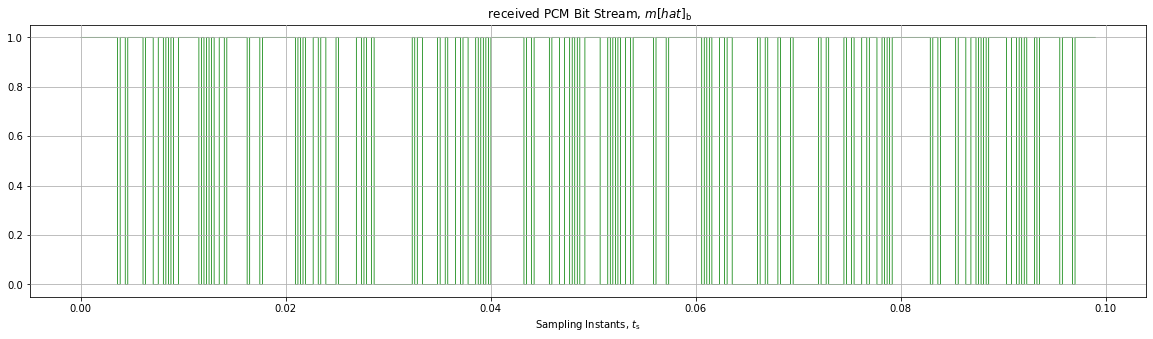

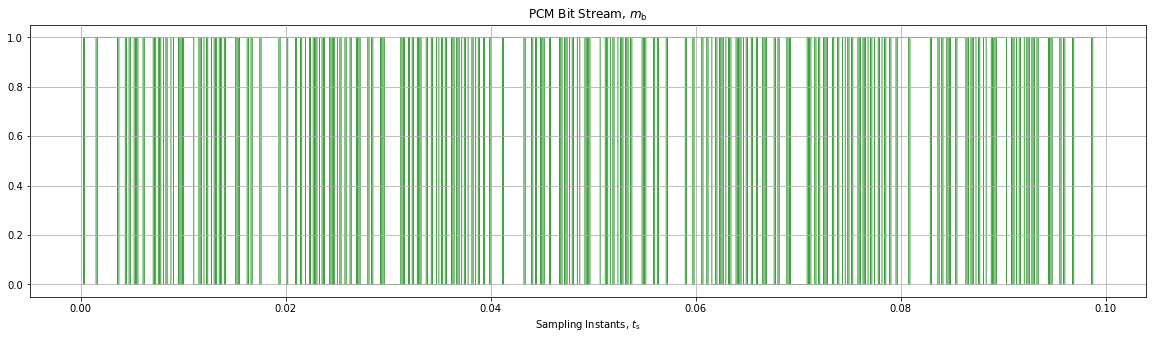

In [ ]:
# ----------------------- Receiver Section ------------------- #
Nb = len(bit_time)
bit_time_four = np.linspace(0, 4/Rb, 4*Nb)
BitLen = int(len(time)/len(bit_time))
basis1 = np.cos(2*np.pi*fc*bit_time_four) # basis for x-axis
basis2 = np.sin(2*np.pi*fc*bit_time_four) # basis for y-axis

m_recv_bits = '' # initialize received bit stream
for i in range(int(BitLen/4)):
  m_tmp = m_qam_noisy[i*4*Nb:(i+1)*4*Nb] # signal of a bit duration
  p_cos = 2*np.mean(m_tmp*basis1) # constel. coordinate (cos)
  p_sin = 2*np.mean(m_tmp*basis2) # constel. coordinate (sin)
  r_q = '1' if p_cos>=0 else '0'
  r_q_c = '1' if p_cos>0 else '0'
  r_i = '1' if p_sin>=0 else '0'
  r_i_c = '1' if p_sin>0 else '0'                    
  m_recv_bits += r_q + r_q_c + r_i + r_i_c # append the bit-pair
bit_error = '' # contains '1' in the position of bit error
for (b1, b2) in zip(bits, m_recv_bits):
  bit_error += '1' if b1!=b2 else '0' # bit error indicator
print("Transmitted Bits =", bits)
print("Recovered Bits   =", m_recv_bits)
print("Error Indicators =", bit_error)
print(len(m_recv_bits))

#stair plot of received bit stream
r_bit_sig=np.fromiter(m_recv_bits,float)
t_bit=np.linspace(t_s[0],t_s[-1],8*len(t_s))

plt.figure(14, figsize=(20,5))
plt.step(t_bit, r_bit_sig, 'g', linewidth=0.75)
plt.xlabel(r"Sampling Instants, $t_\mathrm{s}$")
plt.title(r" received PCM Bit Stream, $m[hat]_\mathrm{b}$")
plt.grid()

plt.figure(15, figsize=(20,5))
plt.step(t_bit, m_bit_sig, 'g', linewidth=0.75)
plt.xlabel(r"Sampling Instants, $t_\mathrm{s}$")
plt.title(r"PCM Bit Stream, $m_\mathrm{b}$")
plt.grid()

b_e = []
for element in bit_error:
  if element=='0':
    b_e.append(0)
  else:
    b_e.append(1)

p_b_e = np.mean(b_e)
print('Probability of bit error:',p_b_e)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


<function matplotlib.pyplot.grid>

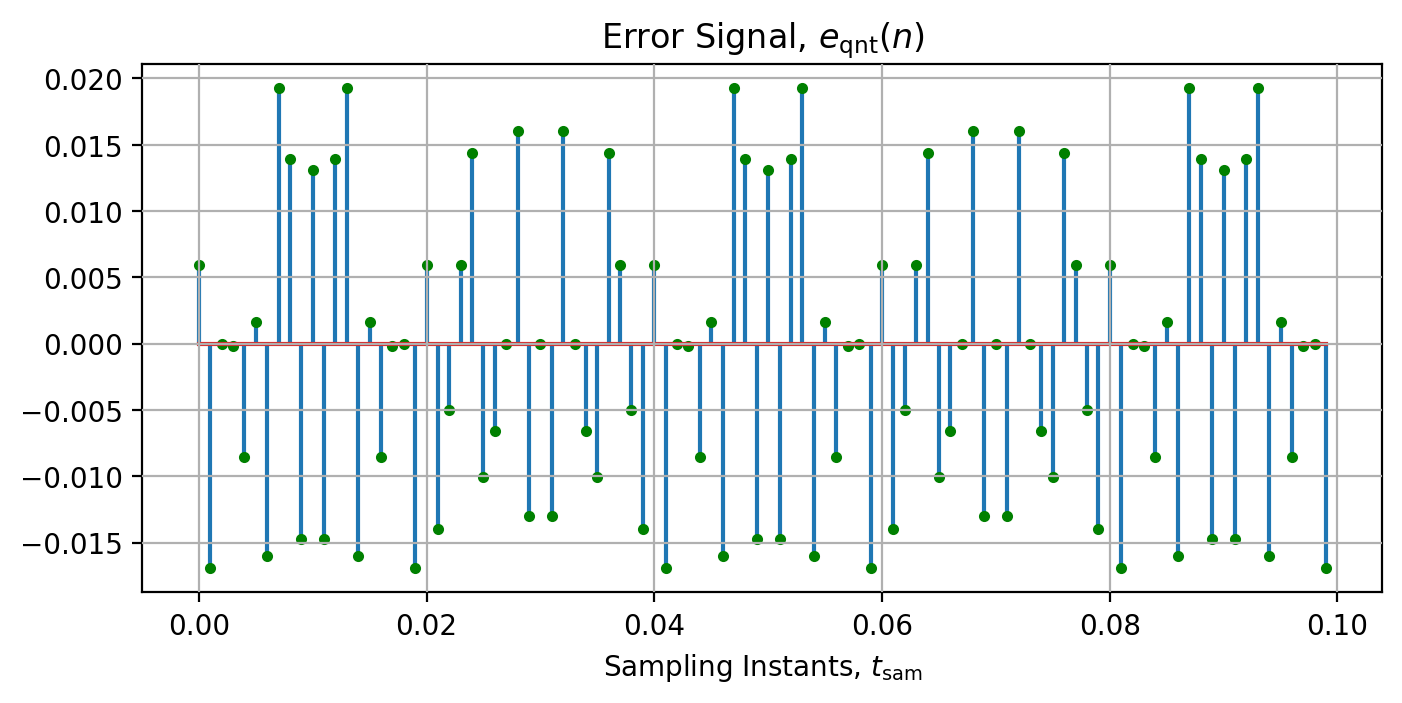

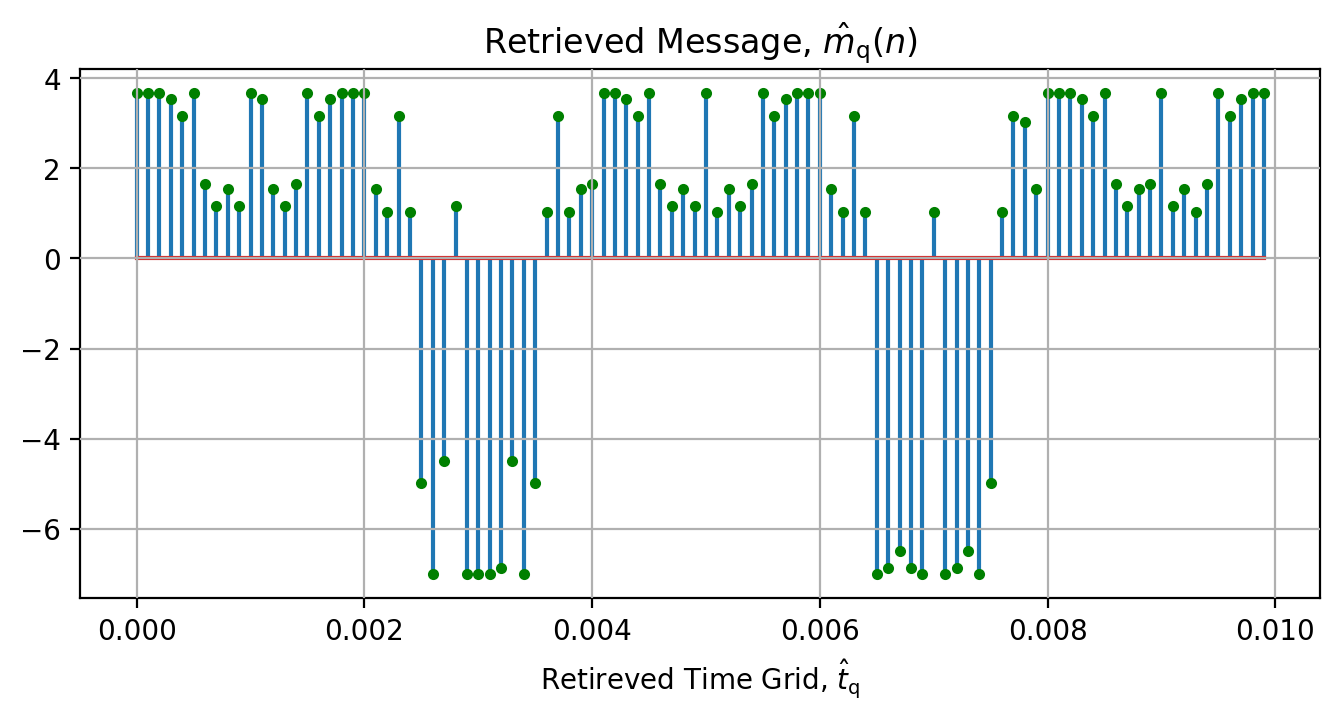

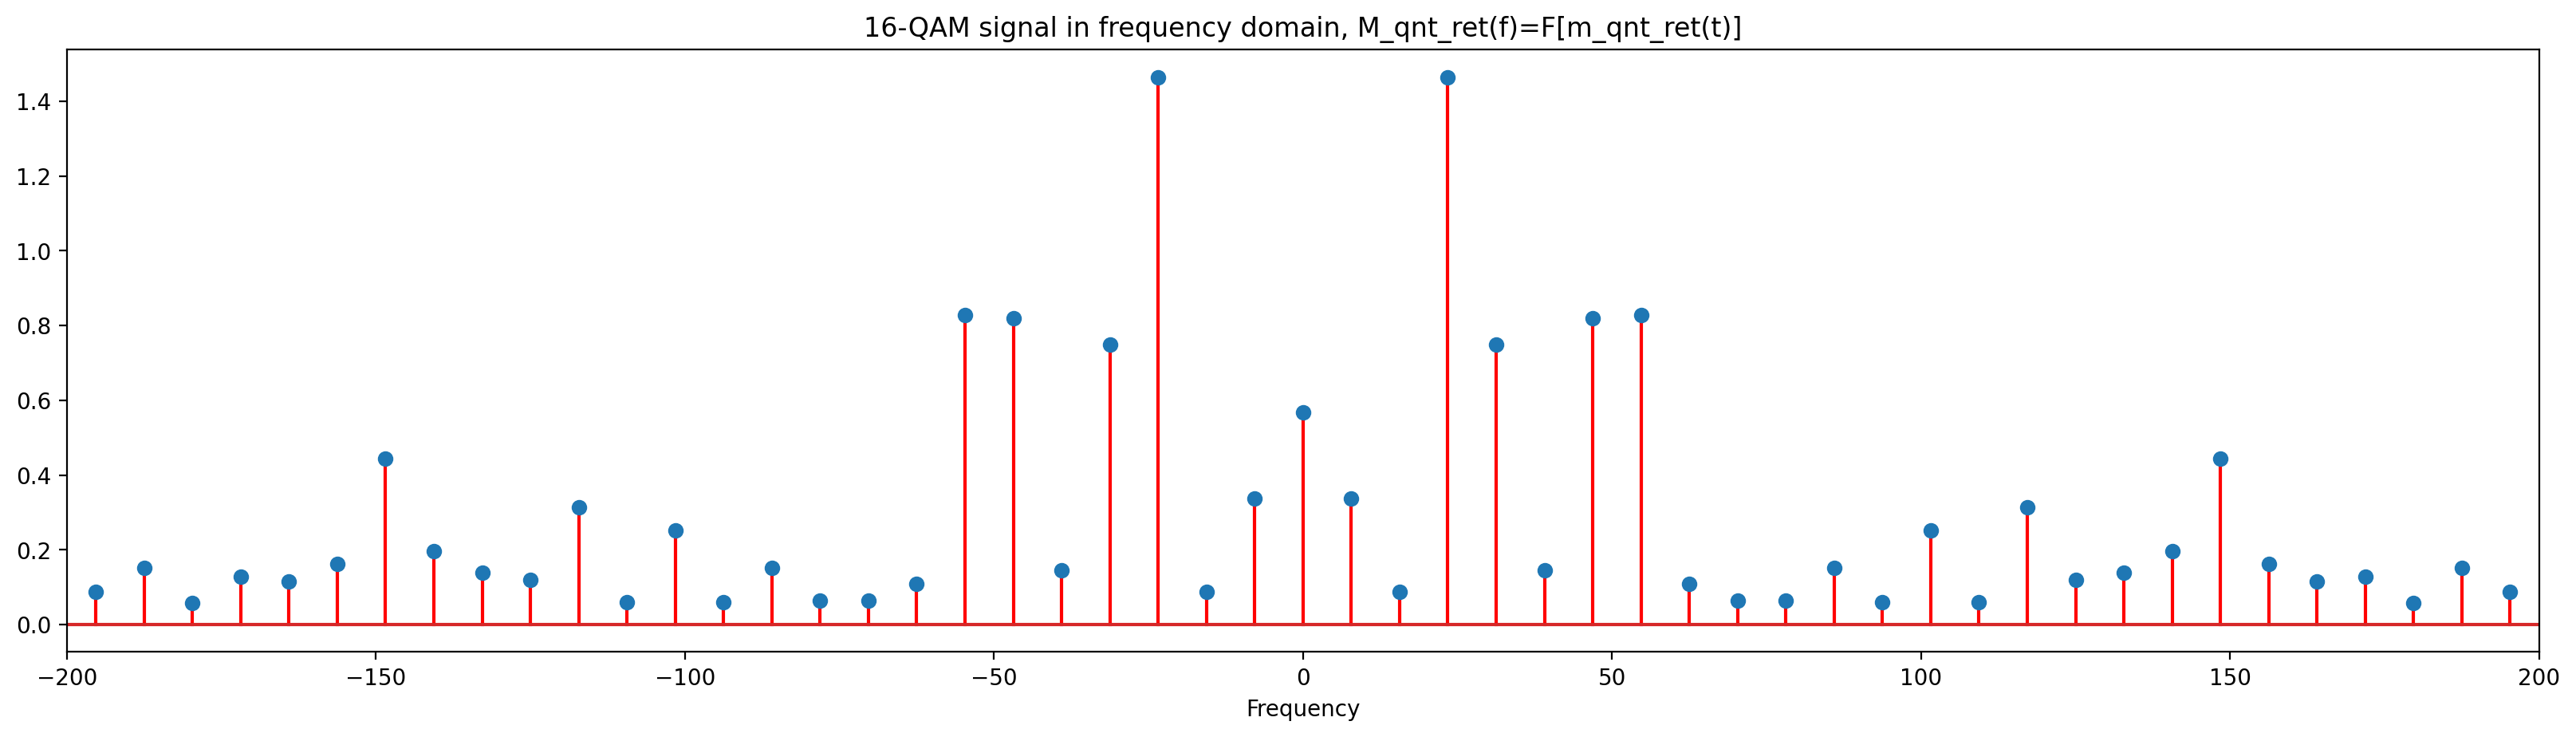

In [ ]:
#PCM decoding
m_bit_recv = m_recv_bits
b=[len(x) for x in bit_dict.values()][0]
Fs_rec = Rb/b

revr_bit_dict=dict([(val,key) for key,val in bit_dict.items()])

#print("Reverse Q-level:Bit Dictionary =\n")
#[print(keys, ":", vals) for keys, vals in revr_bit_dict.items()]

m_qnt_ret=[]
t_val=0; 
t_qnt_ret=[]
for i in range(0, len(m_bit_recv), b):
  bits=m_bit_recv[i:i+b]
  m_qnt_ret.append(revr_bit_dict[bits])
  t_qnt_ret.append(t_val)
  t_val +=1/fc

#Frequency domain for x_qam_noisy
M_qnt_ret,f5=FT(m_qnt_ret,t_s)

# Error Signal, e_qnt(n) = m_sam(n) - m_qnt(n)
e_qnt = m_s - m_q
P_qnt = np.mean(e_qnt**2)

# Plot the error signal, e_qnt(n)
plt.figure(16, figsize = (8,3.5), dpi=200)
plt.stem(t_s, e_qnt, markerfmt='.g', use_line_collection=True)
plt.xlabel(r"Sampling Instants, $t_\mathrm{sam}$")
plt.title(r"Error Signal, $e_\mathrm{qnt}(n)$")
plt.grid()

# plotting retrieved signal in time domain
plt.figure(17,figsize=(8,3.5), dpi=200)
plt.stem(t_qnt_ret, m_qnt_ret, markerfmt='.g', use_line_collection=True)
plt.xlabel(r"Retireved Time Grid, $\hat{t}_\mathrm{q}$")
plt.title(r"Retrieved Message, $\hat{m}_\mathrm{q}(n)$")
plt.grid()

# plotting retrieved signal in frequency domain
plt.figure(18,figsize=(20,5), dpi=200)#frequency domain plot of m_q[hat](n)
plt.stem(f5,abs(M_qnt_ret),'r')
plt.xlim([-200,200])
plt.xlabel("Frequency"); 
plt.title(r"16-QAM signal in frequency domain, M_qnt_ret(f)=F[m_qnt_ret(t)]");
plt.grid